<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [33]:
sac = pd.read_csv(sac_csv)
sac.sample(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
425,8165 AYN RAND CT,SACRAMENTO,95828,CA,4,3,1940,Residential,Mon May 19 00:00:00 EDT 2008,208000,38.468639,-121.403265
811,4509 WINJE DR,ANTELOPE,95843,CA,3,2,2960,Residential,Fri May 16 00:00:00 EDT 2008,350000,38.709513,-121.359357
974,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
883,1434 BELL AVE,SACRAMENTO,95838,CA,3,1,1004,Residential,Thu May 15 00:00:00 EDT 2008,110000,38.647398,-121.432914
961,9020 LUKEN CT,ELK GROVE,95624,CA,3,2,1416,Residential,Thu May 15 00:00:00 EDT 2008,216000,38.451398,-121.366614


In [34]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
columns = ['sq__ft', 'beds', 'baths']

(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(sac[columns],
                                                                         sac.price)
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
predictions = huber.predict(Xtest)
sklearn.metrics.median_absolute_error(Ytest, predictions)

60607.552401666646

In [35]:
ols = sklearn.linear_model.LinearRegression()
ols.fit(Xtrain, Ytrain)
predictions = ols.predict(Xtest)
sklearn.metrics.median_absolute_error(Ytest, predictions)

79369.03821121171

In [36]:
import sklearn.dummy
dummy = sklearn.dummy.DummyRegressor()
dummy.fit(Xtrain, Ytrain)
predictions = dummy.predict(Xtest)
sklearn.metrics.median_absolute_error(Ytest, predictions)

89215.23441734418

In [4]:
sac[sac.latitude < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


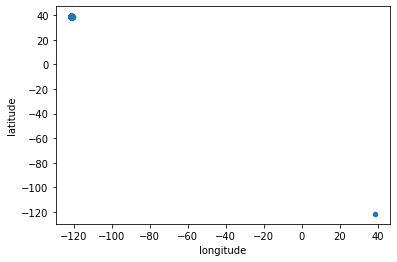

In [38]:
sac.plot.scatter(x='longitude', y='latitude')

In [39]:
#sac = sac[sac.latitude > 0]

In [40]:
latitude_temp = sac.loc[703, 'longitude']
sac.loc[703, 'longitude'] = sac.loc[703, 'latitude']
sac.loc[703, 'latitude'] = latitude_temp
sac.loc[703, 'price'] = - sac.loc[703, 'price']
sac.loc[703, 'sq__ft'] = - sac.loc[703, 'sq__ft']
sac.loc[703, 'state'] = 'CA'

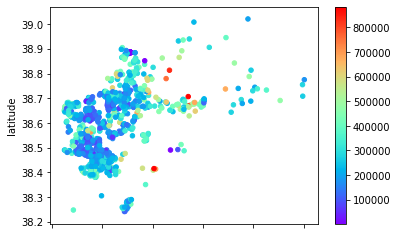

In [41]:
sac.plot.scatter(x='longitude', y='latitude',
                c=sac.price, cmap='rainbow')

In [42]:
sac[sac.price < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [43]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [44]:
sac['empty_lot'] = (sac.beds == 0) & (sac.baths == 0) & (sac.sq__ft == 0)

In [45]:
sac[~sac.empty_lot & (sac.sq__ft == 0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752,False
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378,False
155,4070 REDONDO DR,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,606238,38.666807,-121.064830,False
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.059580,False
223,2778 KAWEAH CT,CAMERON PARK,95682,CA,3,1,0,Residential,Tue May 20 00:00:00 EDT 2008,201000,38.694052,-120.995589,False
224,1636 ALLENWOOD CIR,LINCOLN,95648,CA,4,2,0,Residential,Tue May 20 00:00:00 EDT 2008,202500,38.879192,-121.309477,False
227,2370 BIG CANYON CREEK RD,PLACERVILLE,95667,CA,3,2,0,Residential,Tue May 20 00:00:00 EDT 2008,205000,38.744580,-120.794254,False
230,3361 BOW MAR CT,CAMERON PARK,95682,CA,2,2,0,Residential,Tue May 20 00:00:00 EDT 2008,210000,38.694370,-120.996602,False
262,632 NEWBRIDGE LN,LINCOLN,95648,CA,4,2,0,Residential,Tue May 20 00:00:00 EDT 2008,261800,38.879084,-121.298586,False
278,1102 CHESLEY LN,LINCOLN,95648,CA,4,4,0,Residential,Tue May 20 00:00:00 EDT 2008,297500,38.864864,-121.313988,False


In [46]:
sac[~sac.empty_lot].describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,95757.114025,3.270239,1.995439,1476.844926,239877.896237,38.590680,-121.362142
std,84.820726,0.864675,0.680771,760.257110,130165.212763,0.132885,0.137115
min,95603.000000,1.000000,1.000000,0.000000,1551.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1093.000000,150000.000000,38.477568,-121.448283
50%,95815.000000,3.000000,2.000000,1373.000000,215000.000000,38.618019,-121.386962
75%,95828.000000,4.000000,2.000000,1800.000000,297500.000000,38.684790,-121.310667
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [47]:
real_houses = sac[~sac.empty_lot & (sac.sq__ft > 0)].copy()

In [48]:
real_houses.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,814.0000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,95761.4914,3.244472,1.960688,1591.146192,229448.369779,38.577044,-121.378687
std,85.3440,0.852137,0.669804,663.841930,119825.576060,0.126315,0.119736
min,95603.0000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.0000,3.000000,2.000000,1144.000000,148750.000000,38.473885,-121.451501
50%,95820.0000,3.000000,2.000000,1418.500000,207986.500000,38.591720,-121.405456
75%,95828.0000,4.000000,2.000000,1851.000000,284973.250000,38.674705,-121.325844
max,95864.0000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [49]:
# Sloughhouse is probably just a barn, $2000; 3 bedrooms in 
# Citrus Heights for $30,000 doesn't look right either...

In [50]:
real_houses = real_houses[real_houses.price >= 40000]

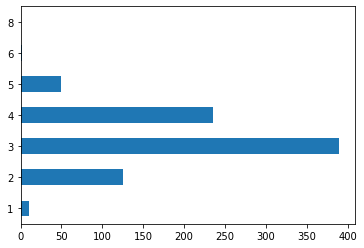

In [51]:
real_houses.beds.value_counts().sort_index().plot.barh()

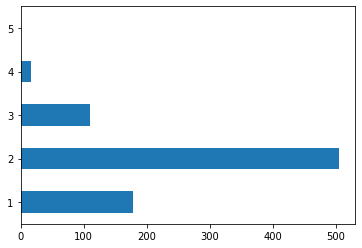

In [52]:
real_houses.baths.value_counts().sort_index().plot.barh()

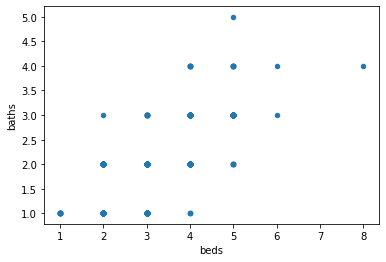

In [53]:
real_houses.plot.scatter(x='beds', y='baths')

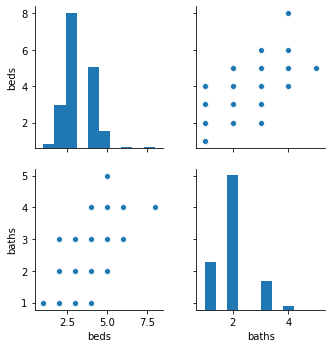

In [54]:
sns.pairplot(real_houses[['beds', 'baths']])

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning

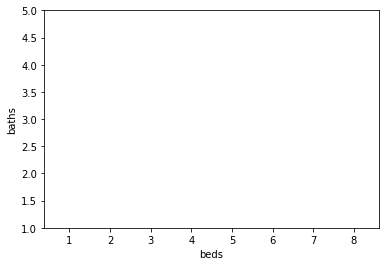

In [55]:
sns.kdeplot(data=real_houses.beds, data2=real_houses.baths)

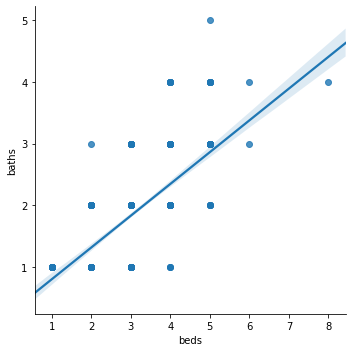

In [56]:
sns.lmplot(data=real_houses, x='beds', y='baths')

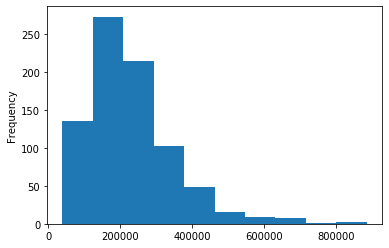

In [57]:
real_houses.price.plot.hist()

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


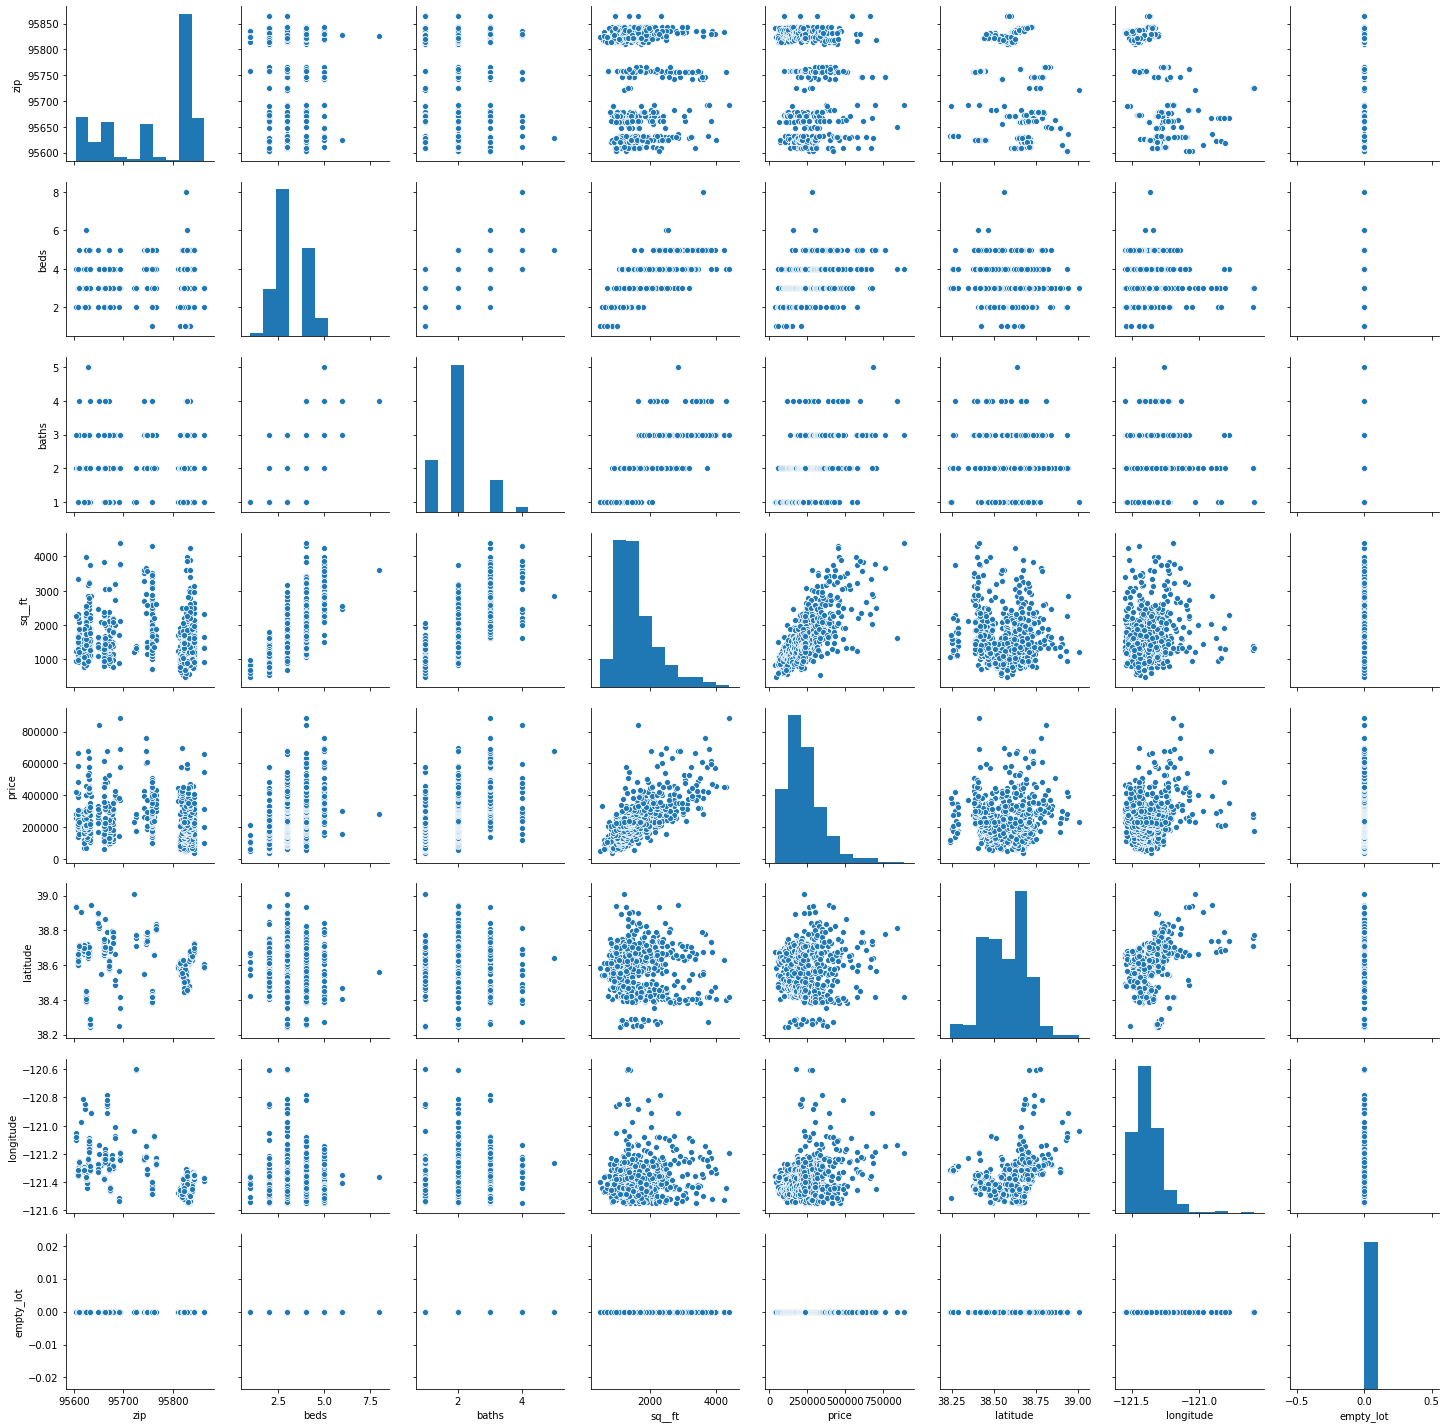

In [58]:
sns.pairplot(real_houses)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [59]:
feature_cols = ['sq__ft', 'beds', 'baths']

In [60]:
fields = sklearn.model_selection.train_test_split(
    real_houses[feature_cols],
    real_houses.price
)
Xtrain = fields[0]
Xtest = fields[1]
Ytrain = fields[2]
Ytest = fields[3]

In [61]:
import sklearn.model_selection
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    real_houses[feature_cols],
    real_houses.price
)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((609, 3), (203, 3), (609,), (203,))

In [62]:
import sklearn.linear_model
ols = sklearn.linear_model.LinearRegression()
ols.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
ols.intercept_, ols.coef_

(61386.76822085862, array([   150.18738794, -25764.48640003,   7519.2830386 ]))

price = 51041 + 148.5 * sqft -21422 * beds + 7611 * baths

price = 71850 + 151 * sqft - 25129 * bed + 195 * baths

price = 75996 + 158 * sqft - 28245 * bed - 1917 * baths

price = 61386 + 150 * sqrt - 25764 * bed + 7519 * baths

In [64]:
predictions = ols.predict(Xtest)

Text(0, 0.5, 'Prediction')

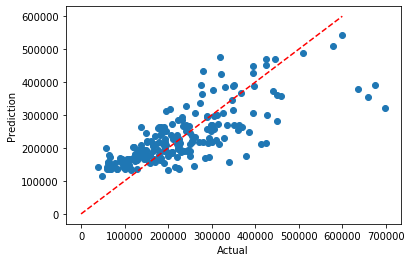

In [65]:
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")

In [67]:
import sklearn.metrics

print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))

50590.81265233009
60844.824516590015
0.5671284420656993


77814.29556650246
92959.10716105705
-2.703258394420871e-05


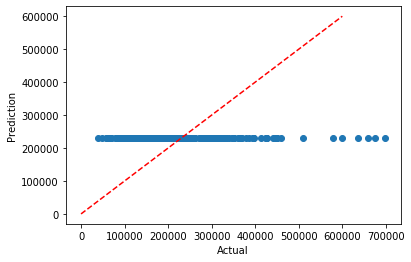

In [68]:
import sklearn.dummy
dummy = sklearn.dummy.DummyRegressor()
dummy.fit(Xtrain, Ytrain)
predictions = dummy.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))

50589.09279184448
60844.65088526473
0.5671314645223697
61383.92338986049 [   150.18820126 -25760.08767101   7512.7940077 ]


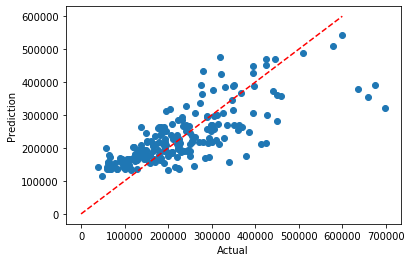

In [69]:
lasso = sklearn.linear_model.Lasso()
lasso.fit(Xtrain, Ytrain)
predictions = lasso.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(lasso.intercept_, lasso.coef_)

46151.38399180793
59694.15706588427
0.5704608477075893
12907.601040823902 [   153.11241873 -12130.75265318   3947.10988865]


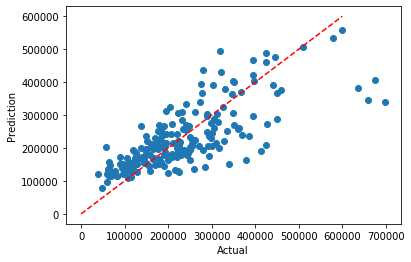

In [70]:
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(Xtrain, Ytrain)
predictions = ts.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(ts.intercept_, ts.coef_)

50495.32607076698
64758.55472520917
0.46564019456104955
76086.20962144717 [    94.6758675    1687.10104017 -10589.00146907]


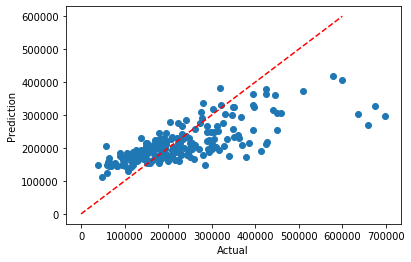

In [71]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, Ytrain)
predictions = ransac.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(ransac.estimator_.intercept_, ransac.estimator_.coef_)

47951.175602970994
59694.16932326391
0.5635195369660331
51417.5294649166 [   145.32895264 -20178.37011167   1956.38160054]


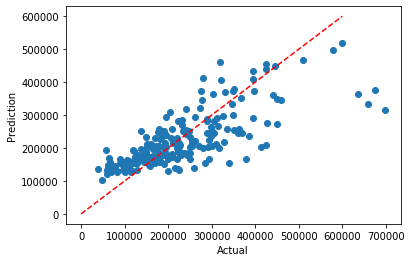

In [73]:
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
predictions = huber.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(huber.intercept_, huber.coef_)

In [74]:
Xtest[Ytest - predictions > 200000]

,sq__ft,beds,baths
548,2660,4,3
156,2325,3,3
550,2896,5,3
834,1493,3,1
519,1179,3,2
333,2484,5,2
831,1304,2,1


In [75]:
real_houses[real_houses.index.isin(
         Xtest[Ytest - predictions > 200000].index)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
156,4004 CRESTA WAY,SACRAMENTO,95864,CA,3,3,2325,Residential,Wed May 21 00:00:00 EDT 2008,660000,38.591618,-121.370626,False
333,1409 47TH ST,SACRAMENTO,95819,CA,5,2,2484,Residential,Tue May 20 00:00:00 EDT 2008,699000,38.563244,-121.446876,False
519,10112 LAMBEAU CT,ELK GROVE,95757,CA,3,2,1179,Residential,Mon May 19 00:00:00 EDT 2008,378000,38.390328,-121.448022,False
548,104 CATLIN CT,FOLSOM,95630,CA,4,3,2660,Residential,Mon May 19 00:00:00 EDT 2008,636000,38.684459,-121.145935,False
550,4629 DORCHESTER LN,GRANITE BAY,95746,CA,5,3,2896,Residential,Mon May 19 00:00:00 EDT 2008,676200,38.723545,-121.216025,False
831,1124 PERKINS WAY,SACRAMENTO,95818,CA,2,1,1304,Residential,Fri May 16 00:00:00 EDT 2008,413500,38.551611,-121.504437,False
834,51 AIKEN WAY,SACRAMENTO,95819,CA,3,1,1493,Residential,Fri May 16 00:00:00 EDT 2008,425000,38.579326,-121.442520,False


In [76]:
real_houses['sprawling_mansion'] = (
    (real_houses.beds > 4) & (real_houses.baths > 2)
)

In [77]:
# look up income on wikipedia / US census?
# distance to downtown
# bucket zip codes based on average price

46295.643722455396
60064.685586006184
0.49754921515482986
0.08185415699394143 [1.37986349e+02 2.68730393e-01 1.75580358e-01 1.97748790e-03]


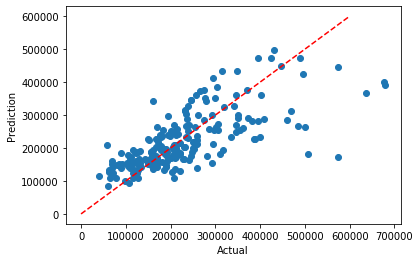

In [78]:
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    real_houses[['sq__ft', 'beds', 'baths', 'sprawling_mansion']],
    real_houses.price
)
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
predictions = huber.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(huber.intercept_, huber.coef_)

In [88]:
zipdata = pd.read_excel("D:/Users/gregb/Downloads/08zp05ca.xls", skiprows=6)
zipdata = zipdata[zipdata['Zip Code'].notnull()]
zipdata = zipdata[zipdata['Zip Code'] != 0]
zipdata['Zip Code'] = zipdata['Zip Code'].map(int)
zipdata = zipdata[zipdata[' Size of Adjusted Gross Income'].isnull()]
zipdata['average_income'] = zipdata['Adjusted gross income (AGI)'] / zipdata['Number of returns']
zipdata

,Size of Adjusted Gross Income,Zip Code,Number of returns,Number of joint returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Adjusted gross income (AGI),Salaries and wages in AGI,Taxable Interest,...,Child tax credit,Child and dependent care credit,Earned income credit,Excess earned income credit (refundable),Alternative minimum tax,Income tax,Total tax liability,Tax due at time of filing,Overpayments refunded,average_income
12,NaN,90001,18561,4858,15726,48872,12781,467773,421709,1958,...,4758,510,18650,15828,23,15555,19559,1800,-47359,25.2019
21,NaN,90002,16133,3585,13121,41457,11202,396358,352279,1371,...,3900,469,19329,16595,47,12325,16112,1623,-43823,24.5682
30,NaN,90003,21982,4776,17938,55981,15120,524938,463744,2099,...,5120,571,25506,21561,53,15944,21403,2154,-57970,23.8804
39,NaN,90004,25057,6713,19098,48083,9862,1398965,891086,45341,...,3626,439,12199,9308,10247,191784,206995,20241,-50468,55.8313
48,NaN,90005,13294,3458,9912,26455,5529,523049,369162,13878,...,1664,213,6680,5129,2168,57060,63097,7038,-22871,39.3447
57,NaN,90006,19691,5048,15990,42941,10256,469843,398768,5295,...,3181,319,14946,11636,315,23368,29915,4698,-34872,23.8608
66,NaN,90007,12367,2283,8331,24320,5529,297574,262371,2568,...,1952,231,8488,6967,230,16704,19314,1549,-22963,24.0619
75,NaN,90008,13333,2177,9303,24528,5664,568468,426690,10024,...,2050,415,8102,6855,1202,51121,54991,6574,-30090,42.6362
84,NaN,90009,1137,166,742,1990,412,61551,49948,1209,...,188,25,313,257,91,6819,7135,599,-2503,54.1346
93,NaN,90010,2055,652,1684,3640,587,294093,122651,16419,...,161,19,361,226,4296,55575,58817,8878,-6966,143.111


In [89]:
real_houses.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'empty_lot',
       'sprawling_mansion'],
      dtype='object')

In [90]:
zipdata.columns

Index([' Size of Adjusted Gross Income', 'Zip Code', 'Number of returns',
       'Number of joint returns', 'Number with paid preparer's signature',
       'Number of exemptions', 'Number of dependents',
       'Adjusted gross income (AGI)', 'Salaries and wages in AGI',
       'Taxable Interest', 'Ordinary Dividends',
       'Business or profession net income (less loss)',
       'Net capital gain (less loss) in AGI',
       'Taxable Individual Retirement Arrangement distributions',
       'Pensions and annuities in AGI', 'Unemployment compensation in AGI',
       'Social Security benefits in AGI', 'Self-employment retirement plans',
       'Total itemized deductions', 'State and Local Income taxes',
       'State and local general sales taxes', 'Real estate taxes',
       'Taxes paid', 'Mortgage Interest paid', 'Contributions',
       'Taxable income', 'Total tax credits', 'Residential Energy Credit',
       'Child tax credit', 'Child and dependent care credit',
       'Earned income 

In [92]:
real_houses_plus_irs = real_houses.merge(zipdata, left_on='zip', right_on='Zip Code')
real_houses_plus_irs.sample(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,Child tax credit,Child and dependent care credit,Earned income credit,Excess earned income credit (refundable),Alternative minimum tax,Income tax,Total tax liability,Tax due at time of filing,Overpayments refunded,average_income
344,4636 TEAL BAY CT,ANTELOPE,95843,CA,4,2,2160,Residential,Fri May 16 00:00:00 EDT 2008,290000,...,6416,594,6807,5358,392,70920,76910,6253,-40942,49.0083
212,2178 63RD AVE,SACRAMENTO,95822,CA,3,2,1207,Residential,Wed May 21 00:00:00 EDT 2008,154000,...,3806,392,8146,7302,1266,80298,85136,7967,-37236,45.1422
517,9512 EMERALD PARK DR Unit 3,ELK GROVE,95624,CA,2,1,840,Condo,Tue May 20 00:00:00 EDT 2008,71000,...,8087,916,6508,5226,3265,153970,164695,15166,-58581,62.0684
628,8369 FOPPIANO WAY,SACRAMENTO,95829,CA,3,2,1124,Residential,Fri May 16 00:00:00 EDT 2008,185833,...,3330,446,3267,2576,1082,58026,62437,6442,-24471,58.9089
84,6561 WEATHERFORD WAY,SACRAMENTO,95823,CA,3,1,1010,Residential,Thu May 15 00:00:00 EDT 2008,116000,...,7266,661,18192,16153,280,55142,59686,5116,-61241,33.4588


In [97]:
real_houses_plus_irs.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'empty_lot',
       'sprawling_mansion', ' Size of Adjusted Gross Income', 'Zip Code',
       'Number of returns', 'Number of joint returns',
       'Number with paid preparer's signature', 'Number of exemptions',
       'Number of dependents', 'Adjusted gross income (AGI)',
       'Salaries and wages in AGI', 'Taxable Interest', 'Ordinary Dividends',
       'Business or profession net income (less loss)',
       'Net capital gain (less loss) in AGI',
       'Taxable Individual Retirement Arrangement distributions',
       'Pensions and annuities in AGI', 'Unemployment compensation in AGI',
       'Social Security benefits in AGI', 'Self-employment retirement plans',
       'Total itemized deductions', 'State and Local Income taxes',
       'State and local general sales taxes', 'Real estate taxes',
       'Taxes paid', 'Mortgage Interest paid', 'Contributio

32505.577464660353
46267.089760889634
0.6356544522012667
0.06214529370088887 [129.18328028   0.2310316    0.13927595   3.02363     -3.95395571
   1.10088778   1.9258913 ]


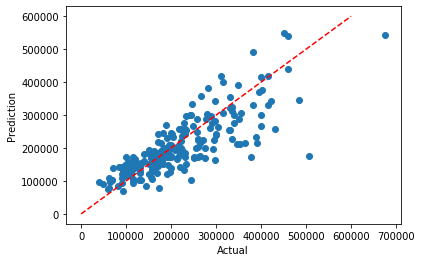

In [101]:
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    real_houses_plus_irs[['sq__ft', 'beds', 'baths', 'average_income',
                         'Number of dependents', 'Real estate taxes',
                          'Ordinary Dividends'
                         ]],
    real_houses_plus_irs.price
)
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
predictions = huber.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(huber.intercept_, huber.coef_)

37211.908134866564
44458.00844641934
0.6916499237644236
-44405.63545591924 [ 1.11344523e+02 -7.44939376e+03  1.02318932e+03  2.44712343e+03
 -4.89364715e-01 -9.46673995e-01  1.93611222e+00]


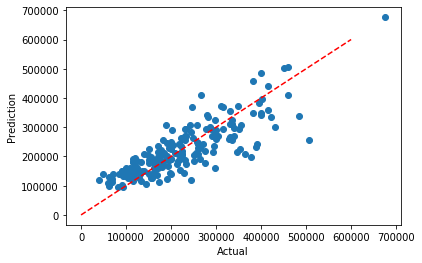

In [102]:
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(Xtrain, Ytrain)
predictions = ts.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(ts.intercept_, ts.coef_)

38255.75449015052
45083.03229053961
0.6861443539425232
-31618.301433128567 [ 1.29307285e+02 -1.83291910e+04  4.43229072e+03  2.44938058e+03
 -7.78803446e-01 -1.18135595e+00  1.23541824e+00]


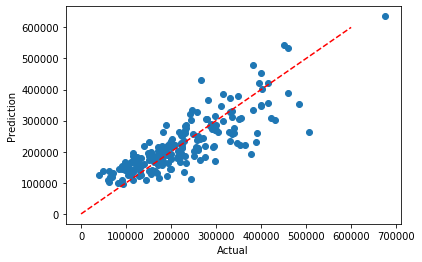

In [104]:
lasso = sklearn.linear_model.Lasso()
lasso.fit(Xtrain, Ytrain)
predictions = lasso.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(lasso.intercept_, lasso.coef_)

In [106]:
pd.get_dummies(real_houses_plus_irs.city)

,ANTELOPE,AUBURN,CAMERON PARK,CARMICHAEL,CITRUS HEIGHTS,COOL,DIAMOND SPRINGS,EL DORADO,EL DORADO HILLS,ELK GROVE,...,POLLOCK PINES,RANCHO CORDOVA,RANCHO MURIETA,RIO LINDA,ROCKLIN,ROSEVILLE,SACRAMENTO,WALNUT GROVE,WEST SACRAMENTO,WILTON
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [109]:
houses_with_city_variable = real_houses.merge(
    pd.get_dummies(real_houses.city), left_index=True, right_index=True)
houses_with_city_variable

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,POLLOCK PINES,RANCHO CORDOVA,RANCHO MURIETA,RIO LINDA,ROCKLIN,ROSEVILLE,SACRAMENTO,WALNUT GROVE,WEST SACRAMENTO,WILTON
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,0,0,0,0,1,0,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,0,0,0,0,1,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,...,0,0,0,0,0,0,1,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,...,0,0,0,0,0,0,1,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,...,0,0,0,0,0,0,1,0,0,0
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,...,0,0,0,0,0,0,1,0,0,0
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,...,0,0,0,0,0,0,1,0,0,0
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,...,0,0,0,0,0,0,1,0,0,0
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,...,0,1,0,0,0,0,0,0,0,0
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,...,0,0,0,1,0,0,0,0,0,0


In [115]:
columns = ['sq__ft', 'beds', 'baths'] + list(real_houses.city.unique())
columns = columns[:-1]

In [116]:
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    houses_with_city_variable[columns],
    houses_with_city_variable.price)

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63997826170.23584, tolerance: 873639484.6641941
  positive)


44892.015069879475
54100.05477924674
0.6627763385311247
77116.3376765521 [ 1.35362789e+02 -2.15631341e+04  2.24879925e+03 -1.43887169e+04
 -1.82469491e+04 -4.60659430e+03  3.72588823e+03 -3.94068360e+04
 -1.97942724e+04 -3.50848173e+03  0.00000000e+00  3.35923167e+03
  8.07200316e+04  4.04947403e+04  1.23540653e+05 -6.18298540e+04
  6.46401615e+04  1.20932807e+05  0.00000000e+00  1.94938532e+05
 -6.55803402e+03  8.19364076e+04  1.44313134e+05  5.01141120e+04
  3.98776318e+04  3.13541355e+04  0.00000000e+00  8.24154059e+04
  3.69289824e+05  8.37935428e+04  7.04080870e+04  2.73748304e+04
  3.10475584e+05  2.92726622e+05  0.00000000e+00  8.52428824e+04
  1.30943729e+05]
sq__ft                135.362789
beds               -21563.134140
baths                2248.799252
SACRAMENTO         -14388.716892
RANCHO CORDOVA     -18246.949124
RIO LINDA           -4606.594300
CITRUS HEIGHTS       3725.888235
NORTH HIGHLANDS    -39406.835986
ANTELOPE           -19794.272393
ELK GROVE           -3508.4

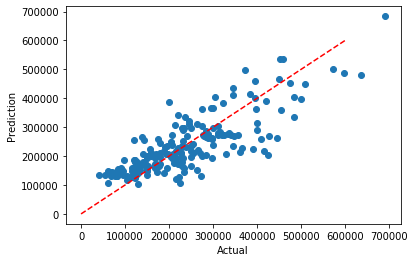

In [117]:
lasso = sklearn.linear_model.Lasso()
lasso.fit(Xtrain, Ytrain)
predictions = lasso.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(lasso.intercept_, lasso.coef_)
print(pd.Series(index=columns, data=lasso.coef_))

In [107]:
real_houses_plus_irs.city.nunique()

35

In [118]:
X = pd.DataFrame({'animal': ['dog', 'cat', 'chicken']})
y = pd.Series([10,20,30])
frame = pd.get_dummies(X.animal)
frame

,cat,chicken,dog
0,0,0,1
1,1,0,0
2,0,1,0


In [119]:
ols = sklearn.linear_model.LinearRegression()
ols.fit(frame, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
ols.coef_, ols.intercept_

(array([-1.39986301e-16,  1.00000000e+01, -1.00000000e+01]), 20.0)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A:

In [124]:
all_data = houses_with_city_variable.merge(zipdata, left_on='zip', right_on='Zip Code')

In [126]:
columns_not_to_use = ['street', 'city', 'zip', 'state', 'type', 'sale_date', 'price', 
                     ' Size of Adjusted Gross Income']
features_to_use = [x for x in all_data.columns if x not in columns_not_to_use]
features_to_use

['beds',
 'baths',
 'sq__ft',
 'latitude',
 'longitude',
 'empty_lot',
 'sprawling_mansion',
 'ANTELOPE',
 'AUBURN',
 'CAMERON PARK',
 'CARMICHAEL',
 'CITRUS HEIGHTS',
 'COOL',
 'DIAMOND SPRINGS',
 'EL DORADO',
 'EL DORADO HILLS',
 'ELK GROVE',
 'ELVERTA',
 'FAIR OAKS',
 'FOLSOM',
 'GALT',
 'GOLD RIVER',
 'GRANITE BAY',
 'GREENWOOD',
 'LINCOLN',
 'LOOMIS',
 'MATHER',
 'MEADOW VISTA',
 'NORTH HIGHLANDS',
 'ORANGEVALE',
 'PENRYN',
 'PLACERVILLE',
 'POLLOCK PINES',
 'RANCHO CORDOVA',
 'RANCHO MURIETA',
 'RIO LINDA',
 'ROCKLIN',
 'ROSEVILLE',
 'SACRAMENTO',
 'WALNUT GROVE',
 'WEST SACRAMENTO',
 'WILTON',
 'Zip Code',
 'Number of returns',
 'Number of joint returns',
 "Number with paid preparer's signature",
 'Number of exemptions',
 'Number of dependents',
 'Adjusted gross income (AGI)',
 'Salaries and wages in AGI',
 'Taxable Interest',
 'Ordinary Dividends',
 'Business or profession net income (less loss)',
 'Net capital gain (less loss) in AGI',
 'Taxable Individual Retirement Arrangeme

In [130]:
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    all_data[features_to_use],
    all_data.price,
    test_size=0.1,
    random_state=543
)

In [132]:
lasso_cv = sklearn.linear_model.LassoCV()
lasso_cv.fit(Xtrain, Ytrain)

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3460747385.3564453, tolerance: 747424136.2931204
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26344430777.833008, tolerance: 747424136.2931204
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16522876838.431152, tolerance: 1061739287.8941733
  positive)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [134]:
dir(lasso_cv)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'alpha_',
 'alphas',
 'alphas_',
 'coef_',
 'copy_X',
 'cv',
 'dual_gap_',
 'eps',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'mse_path_',
 'n_alphas',
 'n_iter_',
 'n_jobs',
 'normalize',
 'path',
 'positive',
 'precompute',
 'predict',
 'random_state',
 'score',
 'selection',
 'set_params',
 'tol',
 'verbose']

In [135]:
lasso_cv.alpha_

15940311.690418124

In [141]:
coefficients = pd.Series(index=features_to_use, data=lasso_cv.coef_)
coefficients[coefficients.abs() > 0]

sq__ft                                           77.467589
Adjusted gross income (AGI)                      -0.157971
Salaries and wages in AGI                        -0.186322
Business or profession net income (less loss)     0.922738
Net capital gain (less loss) in AGI               0.697318
Pensions and annuities in AGI                    -0.379599
Total itemized deductions                         0.506869
Taxable income                                    0.313766
dtype: float64

-----------------------

In [142]:
import sklearn.preprocessing

In [143]:
robust_scaler = sklearn.preprocessing.RobustScaler()
scaled_data = robust_scaler.fit_transform(all_data[features_to_use])
scaled_data

array([[-1.        , -1.        , -0.82390382, ..., -0.56560565,
         0.28061315, -0.6794709 ],
       [ 0.        ,  0.        , -0.72065064, ..., -0.56560565,
         0.28061315, -0.6794709 ],
       [ 1.        ,  0.        ,  0.33592645, ..., -0.56560565,
         0.28061315, -0.6794709 ],
       ...,
       [ 0.        ,  0.        ,  0.05445545, ..., -0.68731096,
         1.48467127,  0.76303726],
       [ 0.        , -1.        ,  0.43635078, ..., -0.69033559,
         1.56990962,  0.21316555],
       [-1.        , -1.        , -0.75601132, ...,  0.17802103,
         0.14287613,  0.22254849]])

In [144]:
scaled_data.shape

(812, 79)

In [145]:
all_data[features_to_use].shape

(812, 79)

In [146]:
scaled_data_df = pd.DataFrame(scaled_data, columns=features_to_use)

In [147]:
scaled_data_df

,beds,baths,sq__ft,latitude,longitude,empty_lot,sprawling_mansion,ANTELOPE,AUBURN,CAMERON PARK,...,Child tax credit,Child and dependent care credit,Earned income credit,Excess earned income credit (refundable),Alternative minimum tax,Income tax,Total tax liability,Tax due at time of filing,Overpayments refunded,average_income
0,-1.0,-1.0,-0.823904,0.200383,-0.230211,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
1,0.0,0.0,-0.720651,0.229049,-0.363415,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
2,1.0,0.0,0.335926,0.224488,-0.128393,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
3,0.0,0.0,-0.436351,0.223575,-0.434360,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
4,-1.0,-1.0,-0.659830,0.229124,-0.371068,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
5,0.0,0.0,-0.293494,0.332823,-0.354522,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
6,1.0,0.0,0.538190,0.319905,-0.320183,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
7,0.0,0.0,-0.010608,0.329592,-0.406015,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
8,-1.0,-1.0,-0.880481,0.234703,-0.231572,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471
9,0.0,-1.0,-0.238331,0.227424,-0.213850,0.0,0.0,0.0,0.0,0.0,...,-0.158241,-0.544186,1.192090,1.206798,-0.234136,-0.710773,-0.701237,-0.565606,0.280613,-0.679471


In [148]:
scaled_data_df.beds.describe()

count    812.000000
mean       0.245074
std        0.853101
min       -2.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: beds, dtype: float64

In [149]:
scaled_data_df.baths.describe()

count    812.000000
mean      -0.041872
std        0.666789
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: baths, dtype: float64

In [150]:
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    scaled_data_df[features_to_use],
    all_data.price,
    test_size=0.1,
    random_state=543
)

In [151]:
lasso_cv = sklearn.linear_model.LassoCV()
lasso_cv.fit(Xtrain, Ytrain)

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770202832.3930664, tolerance: 747424136.2931204
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814529137.9973145, tolerance: 747424136.2931204
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [153]:
coefficients = pd.Series(index=features_to_use, data=lasso_cv.coef_)
coefficients[coefficients.abs() > 0].sort_values()

sprawling_mansion                          -19736.029102
Child and dependent care credit            -15955.253342
RANCHO CORDOVA                             -11867.697812
beds                                        -5375.605717
Residential Energy Credit                   -2832.295460
ELK GROVE                                   -2231.600803
Contributions                               -1594.184513
Zip Code                                      -48.607934
Excess earned income credit (refundable)      599.879161
Ordinary Dividends                           1669.599398
Net capital gain (less loss) in AGI          3214.475043
latitude                                     5461.245026
baths                                        5646.703812
Self-employment retirement plans             7870.709818
longitude                                    9034.474876
average_income                              50635.288083
sq__ft                                      83498.000034
dtype: float64

In [154]:
predictions = lasso_cv.predict(Xtest)
sklearn.metrics.median_absolute_error(Ytest, predictions)

30037.42396342155

In [156]:
sklearn.model_selection.cross_val_score(sklearn.linear_model.LassoCV(), Xtrain, Ytrain,
                                       scoring='neg_median_absolute_error')

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805988263.0698242, tolerance: 454226525.6782997
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Obje

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870463040.2333984, tolerance: 479246057.76887757
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1388633029.220459, tolerance: 479246057.76887757
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1491571226.6035156, tolerance: 479246057.76887757
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 710192332.4199219, tolerance: 530115607.19078887
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1112627022.286621, tolerance: 530115607.19078887
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5615485065.950928, tolerance: 416343287.32732314
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4748657418.311768, tolerance: 416343287.32732314
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5361276913.69873, tolerance: 416343287.32732314
  tol, rng, random, positive)
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\li

array([-36807.4772834 , -37445.64128235, -37777.93679217])